In [1]:
import os
import sys
module_path = os.path.abspath(os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)
from src import data_download as dd
from src import data_testing as dt
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.regression.linear_model import GLS
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
data_dict = dd.get_dataframes()

Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Parcel.zip
    
Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip
    


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2878: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip
    


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2878: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Lookup.zip
    


In [3]:
data_dict.keys()

dict_keys(['parcel', 'res_bldg', 'rp_sale', 'lookup'])

In [4]:
ordinal_features, categorical_features = dd.get_tables(data_dict)

In [5]:
ordinal_features

,SalePrice,BrickStone,NbrLivingUnits,Stories,BldgGrade,SqFt1stFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,FinBasementGrade,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,AddnlCost,SqFtLot,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntFootage,LotDepthFactor,TrafficNoise,Address
0,550000,0,1,3.0,8,370,650,0,0,1560,0,0,0,0,240,0,0,200,2,1,0,1,0,1,0,0,1985,0,3,0,2500,0,0,0,0,0,0,0,0,0,0,0,0,0,8013 11TH AVE NW 98117
1,648500,0,1,2.0,8,1390,0,0,0,3300,0,0,0,0,590,0,0,0,5,1,0,2,1,0,0,0,2005,0,3,6000,5250,0,0,0,0,0,0,0,0,0,0,0,0,0,26034 231ST PL SE
2,1445000,0,1,2.0,9,2150,0,0,0,4920,0,0,0,0,490,300,0,0,5,2,1,3,1,0,0,0,2018,0,3,0,5499,0,0,0,0,0,0,0,0,0,0,0,0,0,3861 223RD AVE SE 98075
3,785000,0,1,2.0,8,580,0,0,0,1540,560,350,210,8,0,0,0,110,3,1,2,1,1,0,0,0,1998,0,3,0,1313,0,0,0,0,0,0,0,0,0,0,0,0,0,5603 28TH AVE NW 98107
4,360000,0,1,1.0,7,1380,0,0,0,1380,0,0,0,0,480,100,0,230,3,0,0,2,0,0,0,0,1996,0,4,0,12200,0,0,0,0,0,0,0,0,0,0,0,0,0,438 TACOMA BLVD 98001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26101,669950,0,1,2.0,8,1193,0,0,0,2482,0,0,0,0,800,300,0,0,5,1,0,3,2,0,0,0,2018,0,3,0,11000,0,0,0,0,0,0,0,0,0,0,0,0,2,20424 DES MOINES MEMORIAL DR S
26102,1150000,0,1,1.5,7,1340,0,0,0,2910,850,850,0,7,0,0,0,140,4,0,1,1,0,1,0,0,1945,0,4,0,8360,0,0,0,0,0,0,0,0,0,0,0,0,0,7409 55TH AVE NE 98115
26103,764500,25,1,1.0,8,1740,0,0,0,2900,1160,1160,0,7,0,230,0,0,4,1,0,1,0,1,0,1,1955,0,4,0,14889,0,0,0,0,0,0,0,0,0,0,0,0,0,18911 ROSS RD 98011
26104,469000,0,1,2.0,9,1240,0,0,0,2420,0,0,0,0,510,40,0,0,4,1,0,2,0,1,0,0,1990,0,3,4610,6175,0,0,0,0,0,0,0,0,0,0,0,0,0,700 SW 328TH PL 98023


In [6]:
categorical_features

,SaleReason,PropertyClass,HeatSystem,HeatSource,PresentUse,HBUAsIfVacant,HBUAsImproved,WaterSystem,SewerSystem,Access,InadequateParking,StreetSurface,Topography,WfntLocation,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,PowerLines,OtherNuisances,AdjacentGolfFairway,AdjacentGreenbelt
0,1,8,4,3,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
1,1,8,5,2,2,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
2,1,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
3,1,8,1,2,29,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
4,1,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26101,1,8,5,2,2,1,1,2,1,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
26102,1,8,5,1,2,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
26103,1,8,6,1,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
26104,1,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N


In [7]:
ordinal_features.corr()

,SalePrice,BrickStone,NbrLivingUnits,Stories,BldgGrade,SqFt1stFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,FinBasementGrade,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,AddnlCost,SqFtLot,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntFootage,LotDepthFactor,TrafficNoise
SalePrice,1.000000,0.071153,0.002149,0.289349,0.563599,0.238252,0.087921,-0.005678,0.012824,0.518041,0.191626,0.194504,0.060636,0.180913,0.133846,0.210726,-0.000739,0.163142,0.258522,0.144654,0.169849,0.280174,0.112755,0.150429,-0.068401,0.067314,0.119194,0.045018,-0.067366,0.073562,0.041981,0.002818,0.122813,0.083490,0.177548,0.089089,0.099939,0.098820,0.078007,0.013080,0.034963,0.014000,0.012476,-0.009102
BrickStone,0.071153,1.000000,-0.003346,-0.132983,0.011377,0.048006,-0.029148,-0.005457,0.017003,-0.006546,0.176409,0.126881,0.019065,0.090635,-0.100068,-0.047891,0.008838,-0.035370,-0.032791,-0.070172,0.023573,-0.087321,-0.055902,0.129088,-0.030766,0.181517,-0.177461,-0.012878,0.059123,-0.021543,-0.005404,0.030425,0.083782,0.043140,0.099901,0.033480,0.091166,0.059135,-0.003856,0.014736,-0.012321,0.001350,-0.002468,0.036326
NbrLivingUnits,0.002149,-0.003346,1.000000,0.011409,0.002021,0.022428,0.001927,0.007207,0.016407,0.038935,0.008829,0.017741,-0.005904,0.003359,0.018202,0.002226,-0.001011,0.000746,0.033275,0.007977,0.028018,0.024877,-0.004024,-0.007995,-0.008882,0.003452,0.007276,0.009248,-0.008401,0.018158,0.003714,0.016834,0.011629,-0.002676,0.001069,-0.003224,0.009569,-0.005050,-0.002363,-0.003953,0.006944,-0.002725,-0.000742,0.003007
Stories,0.289349,-0.132983,0.011409,1.000000,0.506393,-0.264207,0.446643,0.002592,0.000723,0.354337,-0.319179,-0.283700,-0.108792,-0.156311,0.248813,0.200184,-0.019238,0.004284,0.184331,0.413604,-0.023893,0.381898,0.131314,-0.092532,-0.112617,-0.302191,0.594878,-0.065427,-0.357412,0.158948,-0.036210,-0.013590,-0.031375,-0.024254,-0.037312,0.014429,-0.044868,-0.041137,-0.005986,-0.017824,0.014387,-0.012790,-0.007699,-0.015319
BldgGrade,0.563599,0.011377,0.002021,0.506393,1.000000,0.331233,0.115479,-0.011226,0.013772,0.669409,0.013052,0.058468,0.068590,0.092674,0.437642,0.272883,-0.029107,0.161959,0.371825,0.356377,0.143927,0.438458,0.282153,0.137724,-0.122098,0.014709,0.533336,-0.078302,-0.235251,0.193028,0.026827,0.026936,0.063826,0.052760,0.102372,0.047465,0.044061,0.027649,0.049887,-0.014877,0.022946,-0.012019,0.004025,-0.066887
SqFt1stFloor,0.238252,0.048006,0.022428,-0.264207,0.331233,1.000000,-0.216426,0.025646,0.045016,0.611305,0.069671,0.076610,0.027362,-0.125942,0.396265,0.259791,-0.011355,0.104032,0.395697,0.014871,0.140763,0.232448,0.270847,0.144880,0.079351,0.190170,-0.005850,0.037012,0.101374,0.052995,0.184075,0.070366,0.054208,0.070663,0.090762,-0.005295,0.049153,0.035626,0.042377,0.034146,0.021169,0.031683,0.004914,-0.086134
SqFtUpperFloor,0.087921,-0.029148,0.001927,0.446643,0.115479,-0.216426,1.000000,-0.004699,-0.004970,-0.015111,-0.094883,-0.088359,-0.015534,-0.065099,-0.080669,-0.032145,0.012692,0.073596,-0.038830,0.039097,0.047205,0.022051,-0.053712,-0.081028,-0.035830,-0.065436,0.185199,-0.021988,-0.101441,0.018391,-0.035756,-0.000088,-0.008940,-0.008890,-0.003420,0.022646,-0.009689,-0.009793,-0.008270,-0.004907,-0.009170,-0.008498,-0.002596,0.041229
SqFtUnfinFull,-0.005678,-0.005457,0.007207,0.002592,-0.011226,0.025646,-0.004699,1.000000,0.014786,-0.008812,0.000279,-0.007048,0.000062,-0.008138,0.017275,0.003658,0.008800,0.004874,-0.013091,-0.021096,0.005022,-0.012037,0.014987,-0.010575,0.002581,0.002526,-0.009652,0.005953,-0.011182,-0.004595,0.028997,0.055219,-0.003502,0.029532,0.008543,-0.001917,-0.003852,0.002369,-0.001405,-0.002351,-0.001944,-0.001621,-0.000441,0.004908
SqFtUnfinHalf,0.012824,0.017003,0

# running scaling functions for feature selection

In [10]:
SS = StandardScaler()
scaled_ords = pd.DataFrame(SS.fit_transform(ordinal_features.drop('Address', axis = 1)))
scaled_ords.columns = ordinal_features.drop('Address', axis = 1).columns

In [11]:
scaled_ords

,SalePrice,BrickStone,NbrLivingUnits,Stories,BldgGrade,SqFt1stFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,FinBasementGrade,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,AddnlCost,SqFtLot,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntFootage,LotDepthFactor,TrafficNoise
0,-0.481198,-0.193102,-0.047512,2.679175,0.387351,-1.870875,6.847807,-0.028257,-0.029891,-0.611656,-0.806555,-0.660085,-0.460104,-0.789398,-0.065742,-0.640867,-0.169632,0.380026,-1.520362,1.039708,-0.817896,-0.827100,-1.046615,1.598929,-0.252542,-0.421203,0.220683,-0.213602,-0.634985,-0.288115,-0.225975,-0.086952,-0.123933,-0.149116,-0.279481,-0.067856,-0.136309,-0.106285,-0.049733,-0.0832,-0.068782,-0.057357,-0.015615,-0.360922
1,-0.127423,-0.193102,-0.047512,0.838387,0.387351,0.393329,-0.166278,-0.028257,-0.029891,1.477107,-0.806555,-0.660085,-0.460104,-0.789398,1.197416,-0.640867,-0.169632,-0.630825,1.729453,1.039708,-0.817896,0.646373,0.650883,-0.564985,-0.252542,-0.421203,0.853948,-0.213602,-0.634985,2.584599,-0.179138,-0.086952,-0.123933,-0.149116,-0.279481,-0.067856,-0.136309,-0.106285,-0.049733,-0.0832,-0.068782,-0.057357,-0.015615,-0.360922
2,2.733308,-0.193102,-0.047512,0.838387,1.372543,2.080382,-0.166278,-0.028257,-0.029891,3.421817,-0.806555,-0.660085,-0.460104,-0.789398,0.836514,2.044942,-0.169632,-0.630825,1.729453,2.977088,0.775617,2.119846,0.650883,-0.564985,-0.252542,-0.421203,1.265569,-0.213602,-0.634985,-0.288115,-0.174897,-0.086952,-0.123933,-0.149116,-0.279481,-0.067856,-0.136309,-0.106285,-0.049733,-0.0832,-0.068782,-0.057357,-0.015615,-0.360922
3,0.362834,-0.193102,-0.047512,0.838387,0.387351,-1.404715,-0.166278,-0.028257,-0.029891,-0.635665,0.228002,0.191693,0.725225,1.479003,-0.931907,-0.640867,-0.169632,-0.074857,-0.437091,1.039708,2.369131,-0.827100,0.650883,-0.564985,-0.252542,-0.421203,0.632305,-0.213602,-0.634985,-0.288115,-0.246191,-0.086952,-0.123933,-0.149116,-0.279481,-0.067856,-0.136309,-0.106285,-0.049733,-0.0832,-0.068782,-0.057357,-0.015615,-0.360922
4,-1.163607,-0.193102,-0.047512,-1.002401,-0.597841,0.371131,-0.166278,-0.028257,-0.029891,-0.827735,-0.806555,-0.660085,-0.460104,-0.789398,0.800423,0.254403,-0.169632,0.531654,-0.437091,-0.897673,-0.817896,0.646373,-1.046615,-0.564985,-0.252542,-0.421203,0.568979,-0.213602,0.811888,-0.288115,-0.060767,-0.086952,-0.123933,-0.149116,-0.279481,-0.067856,-0.136309,-0.106285,-0.049733,-0.0832,-0.068782,-0.057357,-0.015615,-0.360922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25775,-0.050382,-0.193102,-0.047512,0.838387,0.387351,-0.043973,-0.166278,-0.028257,-0.029891,0.495148,-0.806555,-0.660085,-0.460104,-0.789398,1.955310,2.044942,-0.169632,-0.630825,1.729453,1.039708,-0.817896,2.119846,2.348382,-0.564985,-0.252542,-0.421203,1.265569,-0.213602,-0.634985,-0.288115,-0.081205,-0.086952,-0.123933,-0.149116,-0.279481,-0.067856,-0.136309,-0.106285,-0.049733,-0.0832,-0.068782,-0.057357,-0.015615,3.275094
25776,1.673778,-0.193102,-0.047512,-0.082007,-0.597841,0.282338,-0.166278,-0.028257,-0.029891,1.008936,0.763755,1.408518,-0.460104,1.195453,-0.931907,-0.640867,-0.169632,0.076771,0.646181,-0.897673,0.775617,-0.827100,-1.046615,1.598929,-0.252542,-0.421203,-1.045845,-0.213602,0.811888,-0.288115,-0.126169,-0.086952,-0.123933,-0.149116,-0.279481,-0.067856,-0.136309,-0.106285,-0.049733,-0.0832,-0.068782,-0.057357,-0.015615,-0.360922
25777,0.289206,1.406956,-0.047512,-1.002401,0.387351,1.170261,-0.166278,-0.028257,-0.029891,0.996932,1.336456,2.162949,-0.460104,1.195453,-0.931907,1.418253,-0.169632,-0.630825,0.646181,1.039708,-0.817896,-0.827100,-1.046615,1.5989

# using RFE to auto select initial ordinal features based on scaled data
# then selecting chosen features from unscaled table

In [12]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=20)
select = select.fit(X = scaled_ords.drop('SalePrice', axis=1), y = scaled_ords['SalePrice'])
predictors = ordinal_features.drop('Address', axis = 1)[scaled_ords.columns[[True] + list(select.support_) ]]
predictors

,SalePrice,BldgGrade,SqFt1stFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,FinBasementGrade,SqFtGarageAttached,SqFtOpenPorch,SqFtDeck,Bedrooms,Bath3qtrCount,BathFullCount,YrBuilt,AddnlCost,Olympics,SeattleSkyline,LakeWashington,LakeSammamish
0,550000,8,370,650,1560,0,0,0,0,240,0,200,2,0,1,1985,0,0,0,0,0
1,648500,8,1390,0,3300,0,0,0,0,590,0,0,5,0,2,2005,6000,0,0,0,0
2,1445000,9,2150,0,4920,0,0,0,0,490,300,0,5,1,3,2018,0,0,0,0,0
3,785000,8,580,0,1540,560,350,210,8,0,0,110,3,2,1,1998,0,0,0,0,0
4,360000,7,1380,0,1380,0,0,0,0,480,100,230,3,0,2,1996,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26101,669950,8,1193,0,2482,0,0,0,0,800,300,0,5,0,3,2018,0,0,0,0,0
26102,1150000,7,1340,0,2910,850,850,0,7,0,0,140,4,1,1,1945,0,0,0,0,0
26103,764500,8,1740,0,2900,1160,1160,0,7,0,230,0,4,0,1,1955,0,0,0,0,0
26104,469000,9,1240,0,2420,0,0,0,0,510,40,0,4,0,2,1990,4610,0,0,0,0


In [14]:
model_25_ords = dt.produce_model(predictors, 'SalePrice')

In [15]:
model_25_ords.params.sort_values()

Bedrooms             -3.144166e+04
YrBuilt              -2.526824e+03
SqFtFinBasement      -1.264088e+02
SqFtGarageAttached   -1.129502e+02
SqFtGarageBasement   -9.637310e+01
SqFt1stFloor         -8.477767e+01
AddnlCost            -6.024067e+00
SqFtTotBasement       4.090091e+01
SqFtDeck              4.772615e+01
SqFtOpenPorch         6.886501e+01
SqFtUpperFloor        1.183106e+02
SqFtTotLiving         1.559762e+02
FinBasementGrade      7.219544e+03
Olympics              3.364300e+04
BathFullCount         3.610603e+04
LakeWashington        4.081853e+04
Bath3qtrCount         4.419354e+04
SeattleSkyline        5.388696e+04
LakeSammamish         9.355040e+04
BldgGrade             1.301118e+05
Intercept             4.521041e+06
dtype: float64

In [16]:
model_25_ords.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     1095.
Date:                Fri, 02 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:27:12   Log-Likelihood:            -3.5185e+05
No. Observations:               25780   AIC:                         7.037e+05
Df Residuals:                   25759   BIC:                         7.039e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.521e+06   1.21e+05     37.374      0.000    4.28e+06    4.76e+06
BldgGrade           1.301e+05   2003.932     64.928      0.000    1.26e+05    1.34e+05
SqFt1stFloor         -84.7777      4.363    -19.432      0.000     -93.329     -76.226
SqFtUpperFloor       118.3106     15.043      7.865      0.000      88.826     147.796
SqFtTotLiving        155.9762      3.765     41.428      0.000     148.597     163.356
SqFtTotBasement       40.9009      6.141      6.660      0.000      28.864      52.938
SqFtFinBasement     -126.4088      8.257    -15.310      0.000    -142.592    -110.225
SqFtGarageBasement   -96.3731     10.761     -8.956      0.000    -117.465     -75.281
FinBasementGrade    7219.5435    818.463      8.821      0.000    5615.310    8823.777
SqFtGarageAttached  -112.9502      7.012    -16.109      0.000    -126.693     -99.207
SqFtOpenPorch         68.8650     13.006      5.295      0.000      43.373      94.357
SqFtDeck              47.7262      6.992      6.826      0.000      34.021      61.431
Bedrooms           -3.144e+04   1922.375    -16.356      0.000   -3.52e+04   -2.77e+04
Bath3qtrCount       4.419e+04   2762.073     16.000      0.000    3.88e+04    4.96e+04
BathFullCount       3.611e+04   3075.650     11.739      0.000    3.01e+04    4.21e+04
YrBuilt            -2526.8244     62.805    -40.233      0.000   -2649.927   -2403.722
AddnlCost             -6.0241      0.631     -9.551      0.000      -7.260      -4.788
Olympics            3.364e+04   4134.015      8.138      0.000    2.55e+04    4.17e+04
SeattleSkyline      5.389e+04   7484.858      7.199      0.000    3.92e+04    6.86e+04
LakeWashington      4.082e+04   5108.440      7.990      0.000    3.08e+04    5.08e+04
LakeSammamish       9.355e+04   1.14e+04      8.197      0.000    7.12e+04    1.16e+05
==============================================================================
Omnibus:                     1509.529   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2742.562
Skew:                           0.446   Prob(JB):                         0.00
Kurtosis:                       4.326   Cond. No.                     3.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# working to improve model by adding categorical features

In [17]:
target = 'SalePrice'

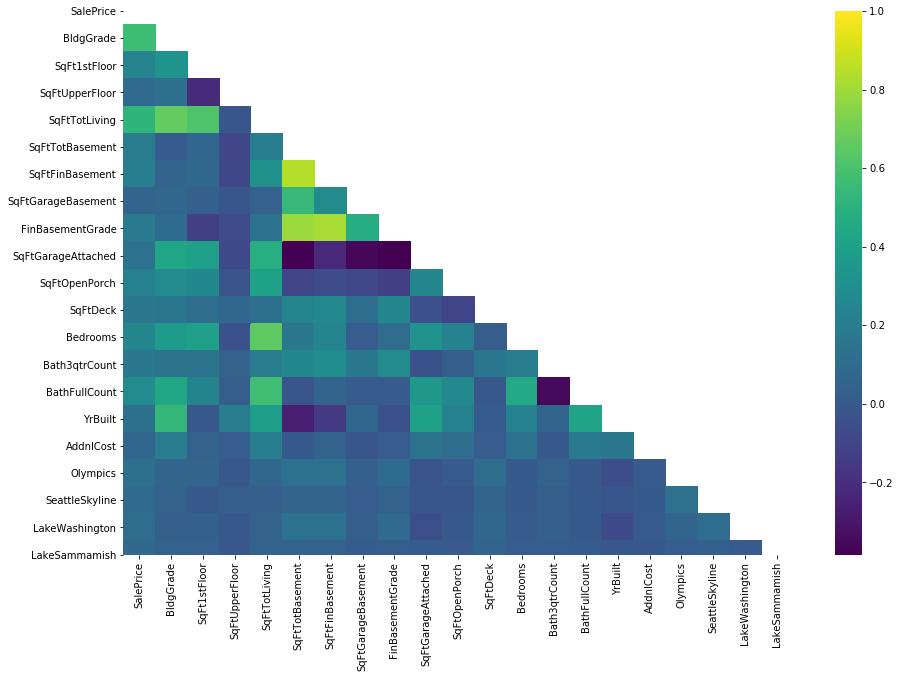

In [18]:
dt.make_heatmap(predictors)

In [19]:
predictors_19 = predictors.drop(['FinBasementGrade'], axis = 1)
dt.produce_model(predictors_19, target).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     1145.
Date:                Fri, 02 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:27:52   Log-Likelihood:            -3.5189e+05
No. Observations:               25780   AIC:                         7.038e+05
Df Residuals:                   25760   BIC:                         7.040e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.353e+06    1.2e+05     36.386      0.000    4.12e+06    4.59e+06
BldgGrade           1.345e+05   1944.973     69.137      0.000    1.31e+05    1.38e+05
SqFt1stFloor         -92.5683      4.279    -21.634      0.000    -100.955     -84.181
SqFtUpperFloor        96.8063     14.866      6.512      0.000      67.668     125.945
SqFtTotLiving        151.6433      3.738     40.564      0.000     144.316     158.971
SqFtTotBasement       49.0113      6.081      8.060      0.000      37.092      60.930
SqFtFinBasement      -86.6911      6.931    -12.508      0.000    -100.276     -73.106
SqFtGarageBasement   -78.2175     10.578     -7.394      0.000     -98.951     -57.484
SqFtGarageAttached  -124.6213      6.896    -18.072      0.000    -138.138    -111.105
SqFtOpenPorch         67.0036     13.023      5.145      0.000      41.477      92.530
SqFtDeck              50.5071      6.996      7.220      0.000      36.795      64.219
Bedrooms           -3.217e+04   1923.469    -16.724      0.000   -3.59e+04   -2.84e+04
Bath3qtrCount       4.692e+04   2748.865     17.067      0.000    4.15e+04    5.23e+04
BathFullCount       3.828e+04   3070.367     12.466      0.000    3.23e+04    4.43e+04
YrBuilt            -2446.8660     62.240    -39.313      0.000   -2568.861   -2324.871
AddnlCost             -6.1400      0.632     -9.722      0.000      -7.378      -4.902
Olympics            3.278e+04   4139.007      7.919      0.000    2.47e+04    4.09e+04
SeattleSkyline      5.382e+04   7496.004      7.180      0.000    3.91e+04    6.85e+04
LakeWashington      3.958e+04   5114.104      7.739      0.000    2.96e+04    4.96e+04
LakeSammamish       9.009e+04   1.14e+04      7.886      0.000    6.77e+04    1.12e+05
==============================================================================
Omnibus:                     1454.764   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2610.598
Skew:                           0.436   Prob(JB):                         0.00
Kurtosis:                       4.292   Cond. No.                     3.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

one hotting BldgGrade

In [20]:
bldg_grade = predictors_19.pop('BldgGrade')

In [21]:
pred_1hot_bldgGrade = pd.concat([predictors_19, pd.get_dummies(bldg_grade, prefix = 'BldgGrade', drop_first = True)], axis = 1, sort = False)

In [22]:
cat_grade_model = dt.produce_model(pred_1hot_bldgGrade, target)

In [23]:
cat_grade_model.params.sort_values()

Bedrooms             -2.840628e+04
YrBuilt              -2.408409e+03
SqFtGarageAttached   -1.213832e+02
SqFt1stFloor         -8.533467e+01
SqFtFinBasement      -8.378780e+01
SqFtGarageBasement   -8.043890e+01
AddnlCost            -5.898226e+00
SqFtDeck              4.605095e+01
SqFtTotBasement       5.462384e+01
SqFtOpenPorch         6.048201e+01
SqFtUpperFloor        9.686006e+01
SqFtTotLiving         1.419006e+02
BldgGrade_5           6.675535e+03
Olympics              3.171674e+04
BathFullCount         3.863525e+04
LakeWashington        3.875550e+04
BldgGrade_6           4.579961e+04
Bath3qtrCount         4.706307e+04
SeattleSkyline        5.203211e+04
BldgGrade_4           8.302973e+04
LakeSammamish         8.746576e+04
BldgGrade_7           1.650822e+05
BldgGrade_8           3.046961e+05
BldgGrade_12          4.804406e+05
BldgGrade_9           4.815299e+05
BldgGrade_10          5.785814e+05
BldgGrade_11          6.604076e+05
Intercept             5.037463e+06
dtype: float64

In [24]:
cat_grade_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     825.7
Date:                Fri, 02 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:29:11   Log-Likelihood:            -3.5174e+05
No. Observations:               25780   AIC:                         7.035e+05
Df Residuals:                   25752   BIC:                         7.038e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.037e+06    1.6e+05     31.515      0.000    4.72e+06    5.35e+06
SqFt1stFloor         -85.3347      4.289    -19.895      0.000     -93.742     -76.928
SqFtUpperFloor        96.8601     14.784      6.552      0.000      67.883     125.837
SqFtTotLiving        141.9006      3.795     37.391      0.000     134.462     149.339
SqFtTotBasement       54.6238      6.067      9.004      0.000      42.733      66.515
SqFtFinBasement      -83.7878      6.898    -12.146      0.000     -97.308     -70.267
SqFtGarageBasement   -80.4389     10.537     -7.634      0.000    -101.092     -59.785
SqFtGarageAttached  -121.3832      6.889    -17.620      0.000    -134.886    -107.880
SqFtOpenPorch         60.4820     12.966      4.664      0.000      35.067      85.897
SqFtDeck              46.0509      6.963      6.613      0.000      32.403      59.699
Bedrooms           -2.841e+04   1951.458    -14.556      0.000   -3.22e+04   -2.46e+04
Bath3qtrCount       4.706e+04   2745.448     17.142      0.000    4.17e+04    5.24e+04
BathFullCount       3.864e+04   3055.308     12.645      0.000    3.26e+04    4.46e+04
YrBuilt            -2408.4086     63.454    -37.955      0.000   -2532.781   -2284.036
AddnlCost             -5.8982      0.633     -9.313      0.000      -7.140      -4.657
Olympics            3.172e+04   4118.169      7.702      0.000    2.36e+04    3.98e+04
SeattleSkyline      5.203e+04   7455.919      6.979      0.000    3.74e+04    6.66e+04
LakeWashington      3.876e+04   5086.820      7.619      0.000    2.88e+04    4.87e+04
LakeSammamish       8.747e+04   1.14e+04      7.695      0.000    6.52e+04     1.1e+05
BldgGrade_4         8.303e+04   1.09e+05      0.765      0.444    -1.3e+05    2.96e+05
BldgGrade_5         6675.5350   1.03e+05      0.065      0.948   -1.95e+05    2.08e+05
BldgGrade_6          4.58e+04   1.02e+05      0.449      0.654   -1.54e+05    2.46e+05
BldgGrade_7         1.651e+05   1.02e+05      1.617      0.106    -3.5e+04    3.65e+05
BldgGrade_8         3.047e+05   1.02e+05      2.983      0.003    1.05e+05    5.05e+05
BldgGrade_9         4.815e+05   1.02e+05      4.710      0.000    2.81e+05    6.82e+05
BldgGrade_10        5.786e+05   1.02e+05      5.646      0.000    3.78e+05    7.79e+05
BldgGrade_11        6.604e+05   1.04e+05      6.354      0.000    4.57e+05    8.64e+05
BldgGrade_12        4.804e+05   1.45e+05      3.308      0.001    1.96e+05    7.65e+05
==============================================================================
Omnibus:                     1363.203   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2504.015
Skew:                           0.406   Prob(JB):                         0.00
Kurtosis:                       4.292   Cond. No.                     

that made a small improvement, time to try adding other categorical features

In [25]:
WfntLocation = categorical_features.pop('WfntLocation')

In [26]:
ords_and_cats_df = pd.concat([pred_1hot_bldgGrade, pd.get_dummies(WfntLocation, prefix = 'WfntLocation', columns = 'WfntLocation', drop_first = True)], sort=False, axis = 1)

In [27]:
model_ords_and_cats = dt.produce_model(ords_and_cats_df, target)

In [28]:
model_ords_and_cats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     638.5
Date:                Fri, 02 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:31:15   Log-Likelihood:            -3.5173e+05
No. Observations:               25780   AIC:                         7.035e+05
Df Residuals:                   25744   BIC:                         7.038e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.008e+06    1.6e+05     31.256      0.000    4.69e+06    5.32e+06
SqFt1stFloor         -84.7072      4.292    -19.735      0.000     -93.120     -76.294
SqFtUpperFloor        96.9658     14.779      6.561      0.000      67.998     125.933
SqFtTotLiving        141.7084      3.797     37.321      0.000     134.266     149.151
SqFtTotBasement       55.1061      6.068      9.082      0.000      43.213      66.999
SqFtFinBasement      -83.7383      6.898    -12.140      0.000     -97.258     -70.218
SqFtGarageBasement   -80.5164     10.543     -7.637      0.000    -101.181     -59.852
SqFtGarageAttached  -121.6602      6.888    -17.664      0.000    -135.160    -108.160
SqFtOpenPorch         59.6100     12.975      4.594      0.000      34.177      85.042
SqFtDeck              44.1750      7.004      6.307      0.000      30.446      57.904
Bedrooms            -2.81e+04   1955.416    -14.371      0.000   -3.19e+04   -2.43e+04
Bath3qtrCount       4.681e+04   2745.764     17.049      0.000    4.14e+04    5.22e+04
BathFullCount        3.85e+04   3054.158     12.606      0.000    3.25e+04    4.45e+04
YrBuilt            -2401.4028     63.484    -37.827      0.000   -2525.834   -2276.972
AddnlCost             -5.8763      0.633     -9.282      0.000      -7.117      -4.635
Olympics            2.919e+04   4200.138      6.950      0.000     2.1e+04    3.74e+04
SeattleSkyline      5.367e+04   7461.118      7.193      0.000     3.9e+04    6.83e+04
LakeWashington      3.321e+04   5435.222      6.111      0.000    2.26e+04    4.39e+04
LakeSammamish       8.633e+04    1.2e+04      7.212      0.000    6.29e+04     1.1e+05
BldgGrade_4         9.526e+04   1.09e+05      0.876      0.381   -1.18e+05    3.08e+05
BldgGrade_5         2.255e+04   1.03e+05      0.219      0.827   -1.79e+05    2.24e+05
BldgGrade_6         5.973e+04   1.02e+05      0.583      0.560   -1.41e+05     2.6e+05
BldgGrade_7         1.798e+05   1.02e+05      1.756      0.079   -2.09e+04     3.8e+05
BldgGrade_8         3.195e+05   1.02e+05      3.119      0.002    1.19e+05     5.2e+05
BldgGrade_9         4.964e+05   1.03e+05      4.841      0.000    2.95e+05    6.97e+05
BldgGrade_10        5.935e+05   1.03e+05      5.773      0.000    3.92e+05    7.95e+05
BldgGrade_11        6.759e+05   1.04e+05      6.483      0.000    4.72e+05     8.8e+05
BldgGrade_12        4.984e+05   1.46e+05      3.424      0.001    2.13e+05    7.84e+05
WfntLocation_1     -1.438e+04   1.02e+05     -0.141      0.888   -2.15e+05    1.86e+05
WfntLocation_3      7.746e+04   2.59e+04      2.994      0.003    2.68e+04    1.28e+05
WfntLocation_4      4.799e+05   2.04e+05      2.353      0.019    8.01e+04     8.8e+05
WfntLocation_5      3.109e+05   1.02e+05      3.042      0.002    1.11e+05    5.11e+05
WfntLocation_6      1.829e+05   6.05e+

# adding engineered feature footprint compared to lot size

In [29]:
ords_and_cats_df['footprint_over_lotsize'] = ordinal_features.apply(lambda x: (x['SqFt1stFloor'] + x['SqFtDeck'] + x['SqFtOpenPorch'] + x['SqFtEnclosedPorch']) / x['SqFtLot'], axis = 1)

In [30]:
ords_and_cats_df

,SalePrice,SqFt1stFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtDeck,Bedrooms,Bath3qtrCount,BathFullCount,YrBuilt,AddnlCost,Olympics,SeattleSkyline,LakeWashington,LakeSammamish,BldgGrade_4,BldgGrade_5,BldgGrade_6,BldgGrade_7,BldgGrade_8,BldgGrade_9,BldgGrade_10,BldgGrade_11,BldgGrade_12,WfntLocation_1,WfntLocation_3,WfntLocation_4,WfntLocation_5,WfntLocation_6,WfntLocation_7,WfntLocation_8,WfntLocation_9,footprint_over_lotsize
0,550000,370,650,1560,0,0,0,240,0,200,2,0,1,1985,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.228000
1,648500,1390,0,3300,0,0,0,590,0,0,5,0,2,2005,6000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.264762
2,1445000,2150,0,4920,0,0,0,490,300,0,5,1,3,2018,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.445536
3,785000,580,0,1540,560,350,210,0,0,110,3,2,1,1998,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.525514
4,360000,1380,0,1380,0,0,0,480,100,230,3,0,2,1996,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.140164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26101,669950,1193,0,2482,0,0,0,800,300,0,5,0,3,2018,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.135727
26102,1150000,1340,0,2910,850,850,0,0,0,140,4,1,1,1945,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.177033
26103,764500,1740,0,2900,1160,1160,0,0,230,0,4,0,1,1955,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.132312
26104,469000,1240,0,2420,0,0,0,510,40,0,4,0,2,1990,4610,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.207287


In [31]:
model_ords_and_cats = dt.produce_model(ords_and_cats_df, target)

In [32]:
model_ords_and_cats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     632.9
Date:                Fri, 02 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:31:52   Log-Likelihood:            -3.5161e+05
No. Observations:               25780   AIC:                         7.033e+05
Df Residuals:                   25743   BIC:                         7.036e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               5.454e+06   1.62e+05     33.636      0.000    5.14e+06    5.77e+06
SqFt1stFloor             -71.2835      4.362    -16.341      0.000     -79.834     -62.733
SqFtUpperFloor            74.5150     14.786      5.040      0.000      45.534     103.496
SqFtTotLiving            144.4534      3.784     38.172      0.000     137.036     151.871
SqFtTotBasement           54.4056      6.041      9.007      0.000      42.566      66.246
SqFtFinBasement          -80.1688      6.871    -11.668      0.000     -93.636     -66.702
SqFtGarageBasement       -65.5759     10.541     -6.221      0.000     -86.237     -44.915
SqFtGarageAttached       -84.8048      7.268    -11.668      0.000     -99.050     -70.559
SqFtOpenPorch             55.4360     12.920      4.291      0.000      30.112      80.760
SqFtDeck                  25.3292      7.081      3.577      0.000      11.450      39.208
Bedrooms               -2.654e+04   1949.305    -13.616      0.000   -3.04e+04   -2.27e+04
Bath3qtrCount           4.262e+04   2747.171     15.513      0.000    3.72e+04     4.8e+04
BathFullCount           3.689e+04   3042.255     12.127      0.000    3.09e+04    4.29e+04
YrBuilt                -2642.5077     65.136    -40.569      0.000   -2770.177   -2514.838
AddnlCost                 -6.5176      0.632    -10.319      0.000      -7.756      -5.280
Olympics                2.899e+04   4181.292      6.934      0.000    2.08e+04    3.72e+04
SeattleSkyline          5.092e+04   7429.778      6.854      0.000    3.64e+04    6.55e+04
LakeWashington          3.355e+04   5410.853      6.200      0.000    2.29e+04    4.42e+04
LakeSammamish           8.924e+04   1.19e+04      7.488      0.000    6.59e+04    1.13e+05
BldgGrade_4             1.003e+05   1.08e+05      0.927      0.354   -1.12e+05    3.12e+05
BldgGrade_5             1.166e+04   1.03e+05      0.114      0.909   -1.89e+05    2.13e+05
BldgGrade_6             4.012e+04   1.02e+05      0.394      0.694    -1.6e+05     2.4e+05
BldgGrade_7             1.521e+05   1.02e+05      1.492      0.136   -4.78e+04    3.52e+05
BldgGrade_8             2.813e+05   1.02e+05      2.757      0.006    8.13e+04    4.81e+05
BldgGrade_9              4.54e+05   1.02e+05      4.446      0.000    2.54e+05    6.54e+05
BldgGrade_10            5.498e+05   1.02e+05      5.370      0.000    3.49e+05    7.51e+05
BldgGrade_11             6.26e+05   1.04e+05      6.029      0.000    4.22e+05     8.3e+05
BldgGrade_12            4.588e+05   1.45e+05      3.166      0.002    1.75e+05    7.43e+05
WfntLocation_1          3607.6827   1.02e+05      0.035      0.972   -1.96e+05    2.03e+05
WfntLocation_3          9.915e+04   2.58e+04      3.845      0.000    4.86e+04     1.5e+05
WfntLocation_4          4.561e+05   2.03e+05      2.247      0.025    5.82e+04  

dropping related features to reduce multicolinearity with new feature

In [33]:
ords_and_cats_df = ords_and_cats_df.drop(['SqFt1stFloor', 'SqFtOpenPorch', 'SqFtDeck'], axis=1)

In [34]:
model_ords_and_cats = dt.produce_model(ords_and_cats_df, target)

we get a loss in r^2 by .001, but at least now we can address the question regarding the effect of footprint/lotsize on sale price

In [35]:
model_ords_and_cats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     674.4
Date:                Fri, 02 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:32:30   Log-Likelihood:            -3.5175e+05
No. Observations:               25780   AIC:                         7.036e+05
Df Residuals:                   25746   BIC:                         7.038e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               4.858e+06   1.59e+05     30.566      0.000    4.55e+06    5.17e+06
SqFtUpperFloor           113.1427     14.602      7.748      0.000      84.522     141.763
SqFtTotLiving            118.3942      3.186     37.156      0.000     112.149     124.640
SqFtTotBasement           59.4399      6.064      9.803      0.000      47.555      71.325
SqFtFinBasement          -66.4598      6.742     -9.858      0.000     -79.675     -53.245
SqFtGarageBasement       -95.2538     10.446     -9.119      0.000    -115.729     -74.779
SqFtGarageAttached       -99.1449      7.242    -13.690      0.000    -113.340     -84.950
Bedrooms               -2.594e+04   1954.687    -13.273      0.000   -2.98e+04   -2.21e+04
Bath3qtrCount            4.02e+04   2755.236     14.591      0.000    3.48e+04    4.56e+04
BathFullCount           4.094e+04   3048.427     13.431      0.000     3.5e+04    4.69e+04
YrBuilt                -2349.4461     62.992    -37.298      0.000   -2472.914   -2225.978
AddnlCost                 -5.9758      0.634     -9.424      0.000      -7.219      -4.733
Olympics                2.814e+04   4199.922      6.701      0.000    1.99e+04    3.64e+04
SeattleSkyline          5.327e+04   7466.032      7.135      0.000    3.86e+04    6.79e+04
LakeWashington          3.323e+04   5437.170      6.111      0.000    2.26e+04    4.39e+04
LakeSammamish           8.768e+04    1.2e+04      7.322      0.000    6.42e+04    1.11e+05
BldgGrade_4             1.018e+05   1.09e+05      0.935      0.350   -1.12e+05    3.15e+05
BldgGrade_5             1549.4885   1.03e+05      0.015      0.988   -2.01e+05    2.04e+05
BldgGrade_6             1.752e+04   1.02e+05      0.171      0.864   -1.83e+05    2.18e+05
BldgGrade_7             1.256e+05   1.02e+05      1.226      0.220   -7.52e+04    3.27e+05
BldgGrade_8             2.581e+05   1.03e+05      2.517      0.012    5.71e+04    4.59e+05
BldgGrade_9             4.332e+05   1.03e+05      4.220      0.000    2.32e+05    6.34e+05
BldgGrade_10             5.25e+05   1.03e+05      5.102      0.000    3.23e+05    7.27e+05
BldgGrade_11            5.923e+05   1.04e+05      5.675      0.000    3.88e+05    7.97e+05
BldgGrade_12            4.293e+05   1.46e+05      2.947      0.003    1.44e+05    7.15e+05
WfntLocation_1          4388.6333   1.02e+05      0.043      0.966   -1.96e+05    2.05e+05
WfntLocation_3          1.162e+05   2.59e+04      4.491      0.000    6.55e+04    1.67e+05
WfntLocation_4          4.791e+05   2.04e+05      2.347      0.019    7.89e+04    8.79e+05
WfntLocation_5          3.245e+05   1.02e+05      3.178      0.001    1.24e+05    5.25e+05
WfntLocation_6          1.905e+05   6.06e+04      3.146      0.002    7.18e+04    3.09e+05
WfntLocation_7          4.565e+04   1.52e+05      0.300      0.764   -2.52e+05  

adding back sqft1stfloor and openporch

In [36]:
ords_and_cats_df['SqFt1stFloor'] = ordinal_features['SqFt1stFloor']
ords_and_cats_df['SqFtOpenPorch'] = ordinal_features['SqFtOpenPorch']

adding sale reason

In [37]:
ords_and_cats_df = pd.concat([ords_and_cats_df, pd.get_dummies(categorical_features['SaleReason'], prefix = 'SaleReason', columns = 'SaleReason', drop_first = True)], sort = False, axis = 1)

In [38]:
model_ords_and_cats = dt.produce_model(ords_and_cats_df, target)

In [39]:
model_ords_and_cats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     511.1
Date:                Fri, 02 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:32:51   Log-Likelihood:            -3.5142e+05
No. Observations:               25780   AIC:                         7.029e+05
Df Residuals:                   25733   BIC:                         7.033e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               5.486e+06   1.61e+05     34.073      0.000    5.17e+06     5.8e+06
SqFtUpperFloor            81.6432     14.642      5.576      0.000      52.945     110.342
SqFtTotLiving            142.9295      3.753     38.088      0.000     135.574     150.285
SqFtTotBasement           58.8895      5.999      9.817      0.000      47.131      70.648
SqFtFinBasement          -80.5889      6.783    -11.882      0.000     -93.883     -67.295
SqFtGarageBasement       -70.9894     10.468     -6.782      0.000     -91.507     -50.472
SqFtGarageAttached       -86.8428      7.213    -12.040      0.000    -100.980     -72.705
Bedrooms               -2.667e+04   1933.702    -13.795      0.000   -3.05e+04   -2.29e+04
Bath3qtrCount           4.256e+04   2726.787     15.607      0.000    3.72e+04    4.79e+04
BathFullCount           3.652e+04   3021.611     12.086      0.000    3.06e+04    4.24e+04
YrBuilt                -2662.8400     64.687    -41.165      0.000   -2789.631   -2536.049
AddnlCost                 -6.5458      0.627    -10.436      0.000      -7.775      -5.316
Olympics                2.975e+04   4148.486      7.171      0.000    2.16e+04    3.79e+04
SeattleSkyline          5.214e+04   7373.405      7.071      0.000    3.77e+04    6.66e+04
LakeWashington          3.404e+04   5369.090      6.340      0.000    2.35e+04    4.46e+04
LakeSammamish           9.065e+04   1.18e+04      7.666      0.000    6.75e+04    1.14e+05
BldgGrade_4              1.24e+05   1.07e+05      1.154      0.248   -8.66e+04    3.35e+05
BldgGrade_5             2.462e+04   1.02e+05      0.242      0.809   -1.75e+05    2.24e+05
BldgGrade_6             5.304e+04   1.01e+05      0.524      0.600   -1.45e+05    2.51e+05
BldgGrade_7             1.646e+05   1.01e+05      1.627      0.104   -3.37e+04    3.63e+05
BldgGrade_8             2.949e+05   1.01e+05      2.912      0.004    9.64e+04    4.93e+05
BldgGrade_9             4.684e+05   1.01e+05      4.620      0.000     2.7e+05    6.67e+05
BldgGrade_10            5.654e+05   1.02e+05      5.563      0.000    3.66e+05    7.65e+05
BldgGrade_11            6.397e+05   1.03e+05      6.207      0.000    4.38e+05    8.42e+05
BldgGrade_12            5.164e+05   1.44e+05      3.588      0.000    2.34e+05    7.99e+05
WfntLocation_1          4.444e+04   1.01e+05      0.440      0.660   -1.53e+05    2.42e+05
WfntLocation_3          1.134e+05   2.56e+04      4.434      0.000    6.33e+04    1.64e+05
WfntLocation_4          4.487e+05   2.02e+05      2.226      0.026    5.36e+04    8.44e+05
WfntLocation_5          3.195e+05   1.01e+05      3.169      0.002    1.22e+05    5.17e+05
WfntLocation_6          2.112e+05   5.99e+04      3.524      0.000    9.37e+04    3.29e+05
WfntLocation_7          2.902e+04    1.5e+05      0.193      0.847   -2.65e+05  

adding AdjacentGolfFairway as a feature

In [40]:
ords_and_cats_df = pd.concat([ords_and_cats_df, pd.get_dummies(categorical_features['AdjacentGolfFairway'], prefix = 'AdjacentGolfFairway', columns = 'AdjacentGolfFairway', drop_first = True)], sort = False, axis = 1)

In [41]:
model_ords_and_cats = dt.produce_model(ords_and_cats_df, target)

In [42]:
model_ords_and_cats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     500.8
Date:                Fri, 02 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:33:07   Log-Likelihood:            -3.5141e+05
No. Observations:               25780   AIC:                         7.029e+05
Df Residuals:                   25732   BIC:                         7.033e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               5.494e+06   1.61e+05     34.130      0.000    5.18e+06    5.81e+06
SqFtUpperFloor            81.8617     14.638      5.592      0.000      53.170     110.553
SqFtTotLiving            142.5857      3.753     37.993      0.000     135.230     149.942
SqFtTotBasement           58.6567      5.998      9.780      0.000      46.901      70.413
SqFtFinBasement          -79.9045      6.783    -11.779      0.000     -93.201     -66.608
SqFtGarageBasement       -70.7517     10.465     -6.761      0.000     -91.265     -50.239
SqFtGarageAttached       -85.9848      7.215    -11.918      0.000    -100.126     -71.843
Bedrooms               -2.671e+04   1933.260    -13.815      0.000   -3.05e+04   -2.29e+04
Bath3qtrCount           4.254e+04   2726.136     15.606      0.000    3.72e+04    4.79e+04
BathFullCount           3.636e+04   3021.193     12.035      0.000    3.04e+04    4.23e+04
YrBuilt                -2667.2770     64.683    -41.236      0.000   -2794.060   -2540.494
AddnlCost                 -6.5516      0.627    -10.448      0.000      -7.781      -5.323
Olympics                2.975e+04   4147.492      7.172      0.000    2.16e+04    3.79e+04
SeattleSkyline          5.194e+04   7371.825      7.046      0.000    3.75e+04    6.64e+04
LakeWashington          3.383e+04   5368.114      6.302      0.000    2.33e+04    4.44e+04
LakeSammamish           9.017e+04   1.18e+04      7.627      0.000     6.7e+04    1.13e+05
BldgGrade_4             1.239e+05   1.07e+05      1.153      0.249   -8.67e+04    3.34e+05
BldgGrade_5             2.419e+04   1.02e+05      0.238      0.812   -1.75e+05    2.24e+05
BldgGrade_6             5.252e+04   1.01e+05      0.519      0.604   -1.46e+05    2.51e+05
BldgGrade_7             1.641e+05   1.01e+05      1.622      0.105   -3.42e+04    3.62e+05
BldgGrade_8             2.949e+05   1.01e+05      2.912      0.004    9.64e+04    4.93e+05
BldgGrade_9             4.687e+05   1.01e+05      4.625      0.000     2.7e+05    6.67e+05
BldgGrade_10            5.656e+05   1.02e+05      5.566      0.000    3.66e+05    7.65e+05
BldgGrade_11            6.417e+05   1.03e+05      6.228      0.000     4.4e+05    8.44e+05
BldgGrade_12            5.152e+05   1.44e+05      3.580      0.000    2.33e+05    7.97e+05
WfntLocation_1          4.455e+04   1.01e+05      0.441      0.659   -1.53e+05    2.42e+05
WfntLocation_3          1.132e+05   2.56e+04      4.424      0.000     6.3e+04    1.63e+05
WfntLocation_4          4.482e+05   2.02e+05      2.224      0.026    5.32e+04    8.43e+05
WfntLocation_5          3.194e+05   1.01e+05      3.169      0.002    1.22e+05    5.17e+05
WfntLocation_6          2.116e+05   5.99e+04      3.531      0.000    9.41e+04    3.29e+05
WfntLocation_7          3.091e+04    1.5e+05      0.206      0.837   -2.63e+05  

# running josh's code to test assumptions
also going ahead and turning his code into functions for ease of repeated use and readability

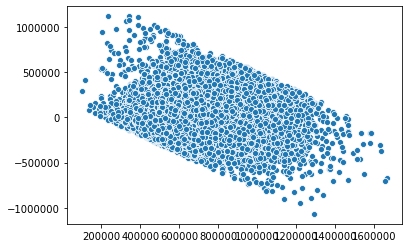

{'rainbow_stat': 0.952596633705087, 'rainbow_p_value': 0.9970583602854736}


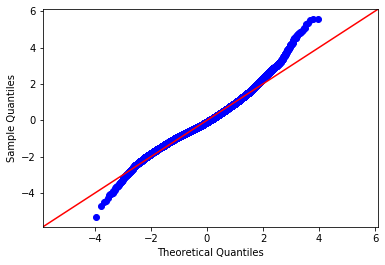

            VIF                 feature
0      1.200563          SqFtUpperFloor
1     43.850525           SqFtTotLiving
2     10.296131         SqFtTotBasement
3      7.022212         SqFtFinBasement
4      2.409214      SqFtGarageBasement
5      4.516317      SqFtGarageAttached
6     29.450558                Bedrooms
7      3.073889           Bath3qtrCount
8     16.503050           BathFullCount
9   4106.489065                 YrBuilt
10     1.180256               AddnlCost
11     1.110609                Olympics
12     1.040500          SeattleSkyline
13     1.197093          LakeWashington
14     1.123241           LakeSammamish
15     5.603442             BldgGrade_4
16    43.990196             BldgGrade_5
17   374.005017             BldgGrade_6
18  1527.560187             BldgGrade_7
19  1408.964592             BldgGrade_8
20   536.196591             BldgGrade_9
21   134.938868            BldgGrade_10
22    21.075742            BldgGrade_11
23     1.668415            BldgGrade_12


In [43]:
def homoskedasticity_test(model):
    y_hat = model.predict()
    fig = sns.scatterplot(x = y_hat, y = model.resid)
    plt.show()

def rainbow_stats(model):
    rainbow_statistic, rainbow_p_value = linear_rainbow(model)
    return {'rainbow_stat': rainbow_statistic, 'rainbow_p_value': rainbow_p_value}

def normality_graph(model):
    fig = sm.graphics.qqplot(model.resid, dist = scipy.stats.norm, line = '45', fit=True)
    plt.show()

def colinearity_testing(predictors):
    rows = predictors.values

    vif_df = pd.DataFrame()
    vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(len(predictors.columns))]
    vif_df["feature"] = predictors.columns

    return vif_df

def check_assumptions(model, predictors):
    '''
    takes in a linear model and a dataframe of predictors (do not include target in predictors dataframe)
    return: none, this function only prints all assumption test results to the notebook output
    '''
    homoskedasticity_test(model)
    print(rainbow_stats(model))
    normality_graph(model)
    print(colinearity_testing(predictors))
    
check_assumptions(model_ords_and_cats, ords_and_cats_df.drop(target, axis = 1))

my final model has a mediocre r^2 and is not even close to passing assumption testing, if I had more time I would try to filter my predictors according to the results of the assumption tests